# Import Libraries

In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import re
import collections
import operator
import imageio
from sklearn import linear_model
from functools import reduce

# Get Train Images and Assign Id

In [63]:
# AWS directory
# train_directory = '../simpsons_train_scaled'

# Local directory
train_directory = '/media/sf_Gee_Hard_Drive/Kaggle Data/the-simpsons-characters-dataset/simpsons_train_scaled'

classes = os.listdir(train_directory)[0:3]
class_indices = np.arange(len(classes))
class_dict = dict(zip(classes, class_indices))
class_dict

{'abraham_grampa_simpson': 0, 'agnes_skinner': 1, 'apu_nahasapeemapetilon': 2}

In [167]:
def getDirs(main):
    classes = os.listdir(main)[0:3]
    combo = []
    [combo.append([class_dict[clas], clas, main + '/' + clas]) for clas in classes]
    return(combo)

def getPics(directory):
    pics = os.listdir(directory)
    picPath = [directory + '/' + pic for pic in pics]
    return(picPath)

def readImage(imagePath):
    pix = imageio.imread(imagePath)
    return(pix)

imageDirs = getDirs(train_directory)
s = list(map(lambda x: [x[0], x[1], getPics(x[2])], imageDirs))

trainPix = []
for arr in s:
    for picArray in arr[2]:
        pix = readImage(picArray)
        trainPix.append([arr[0], arr[1], pix])

In [168]:
trainPix

[[0, 'abraham_grampa_simpson', Image([[[190, 118,  68],
          [191, 117,  68],
          [191, 117,  68],
          ...,
          [195, 116,  73],
          [195, 116,  73],
          [195, 116,  73]],
  
         [[193, 116,  72],
          [193, 116,  70],
          [193, 116,  70],
          ...,
          [195, 116,  73],
          [195, 116,  73],
          [195, 116,  73]],
  
         [[194, 115,  72],
          [194, 115,  72],
          [194, 116,  70],
          ...,
          [195, 117,  71],
          [195, 117,  71],
          [195, 117,  71]],
  
         ...,
  
         [[173,  92, 148],
          [173,  92, 148],
          [173,  92, 148],
          ...,
          [ 45,  63,  73],
          [ 45,  63,  73],
          [ 45,  63,  73]],
  
         [[173,  92, 148],
          [173,  92, 148],
          [173,  92, 148],
          ...,
          [ 45,  63,  73],
          [ 45,  63,  73],
          [ 45,  63,  73]],
  
         [[173,  92, 148],
          [173,  92, 1

In [66]:
# Get all test images into a similar format given the one directory they are all in

# AWS directory
# test_directory = '../simpsons_test_scaled'
# test_pics = os.listdir(test_directory)
# ids = []
# for pic in test_pics:
#     if pic != '.DS_Store':
#         path = test_directory + '/' + pic
#         pix_array = imageio.imread(path)
#         character_label = re.sub('_[0-9]{1,2}.jpg$', '', pic)
#         ids.append([pix_array, character_label, class_dict[character_label]])
# testObj = np.array(ids)
# testObj.shape, testObj[0][0].shape

# Local directory
# test_directory = '/media/sf_Gee_Hard_Drive/Kaggle Data/the-simpsons-characters-dataset/simpsons_test_scaled'

# test_pics = os.listdir(test_directory)
# ids = []
# for pic in test_pics:
#     character_label = re.sub("_[0-9]{1,2}.jpg$", '', pic)
#     if((character_label == classes[0]) | (character_label == classes[1]) | (character_label == classes[2])):
#         path = test_directory + '/' + pic
#         pix_array = imageio.imread(path)
#         ids.append([pix_array, character_label, class_dict[character_label]])
# testObj = np.array(ids)
# testObj.shape, testObj[0][0].shape

# Print out the first 10 pics

/home/gclarkjr5/tensorflow/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


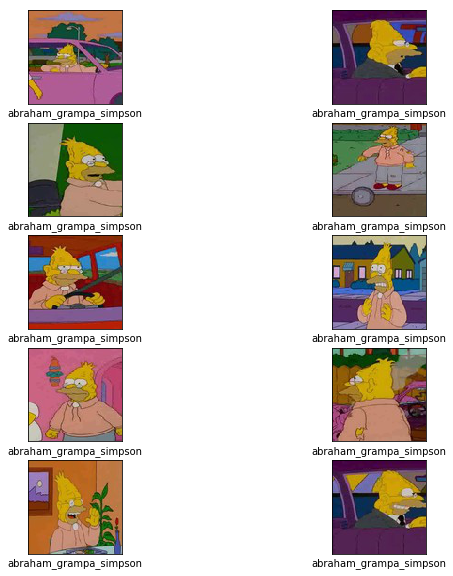

In [173]:
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(len(trainPix[0:10])):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(trainPix[i][2], cmap=plt.cm.binary)
    plt.xlabel(trainPix[i][1])

# PreProcess and convert 0-255 RGB to 0-1 range

In [175]:
def preProcess(obj):
    for i in range(len(obj)):
        obj[i][2] = obj[i][2]/255

preProcess(trainPix)
# preProcess(testObj)

# trainObj.shape, testObj.shape


In [176]:
trainPix[0]

[0, 'abraham_grampa_simpson', Image([[[0.00292195, 0.00181469, 0.00104575],
         [0.00293733, 0.00179931, 0.00104575],
         [0.00293733, 0.00179931, 0.00104575],
         ...,
         [0.00299885, 0.00178393, 0.00112265],
         [0.00299885, 0.00178393, 0.00112265],
         [0.00299885, 0.00178393, 0.00112265]],
 
        [[0.00296809, 0.00178393, 0.00110727],
         [0.00296809, 0.00178393, 0.00107651],
         [0.00296809, 0.00178393, 0.00107651],
         ...,
         [0.00299885, 0.00178393, 0.00112265],
         [0.00299885, 0.00178393, 0.00112265],
         [0.00299885, 0.00178393, 0.00112265]],
 
        [[0.00298347, 0.00176855, 0.00110727],
         [0.00298347, 0.00176855, 0.00110727],
         [0.00298347, 0.00178393, 0.00107651],
         ...,
         [0.00299885, 0.00179931, 0.00109189],
         [0.00299885, 0.00179931, 0.00109189],
         [0.00299885, 0.00179931, 0.00109189]],
 
        ...,
 
        [[0.00266052, 0.00141484, 0.00227605],
         [0.

In [177]:
labels = list(map(lambda x: x[0], trainPix))

images = list(map(lambda x: x[2], trainPix))

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


## Grab sample (all for AWS) and shuffle  and flatten data

In [110]:
# Flatten interlying matrices (100, 100, 3) should come out to 30000 features
# Grab a sample
def grabSample(images, labels, amount):
    zipList = list(zip(images, labels))
    zipList = zipList[0:amount]
    np.random.shuffle(zipList)
    zipList = np.array(zipList)
    ims = list(map(lambda x: np.ndarray.flatten(x[0]), zipList))
    ims = np.array(ims)
    labs = list(map(lambda x: x[1], zipList))
    labs = np.array(labs)
    return ims, labs

trainIms, trainLabs = grabSample(train_images, train_labels, 1000)

testIms, testLabs = grabSample(test_images, test_labels, len(test_labels))

trainIms.shape, trainLabs.shape, testIms.shape, testLabs.shape

((1000, 30000), (1000,), (98, 30000), (98,))

# Create Multinomial Logistic Regression Model

In [102]:
regr = linear_model.LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

# Fit Model to training data

In [ ]:
regr.fit(X = trainIms, y = trainLabs)

# Predict on test data

In [109]:
regr.score(testIms, testLabs)

0.7653061224489796